## **Tarefa DataSet Competição**

### **The Data**
This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

### **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing

### **Get the data**


In [2]:
data = pd.read_csv('dataset-acidentes.csv')

In [3]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [4]:
data.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


In [5]:
data.shape

(5000, 13)

In [6]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


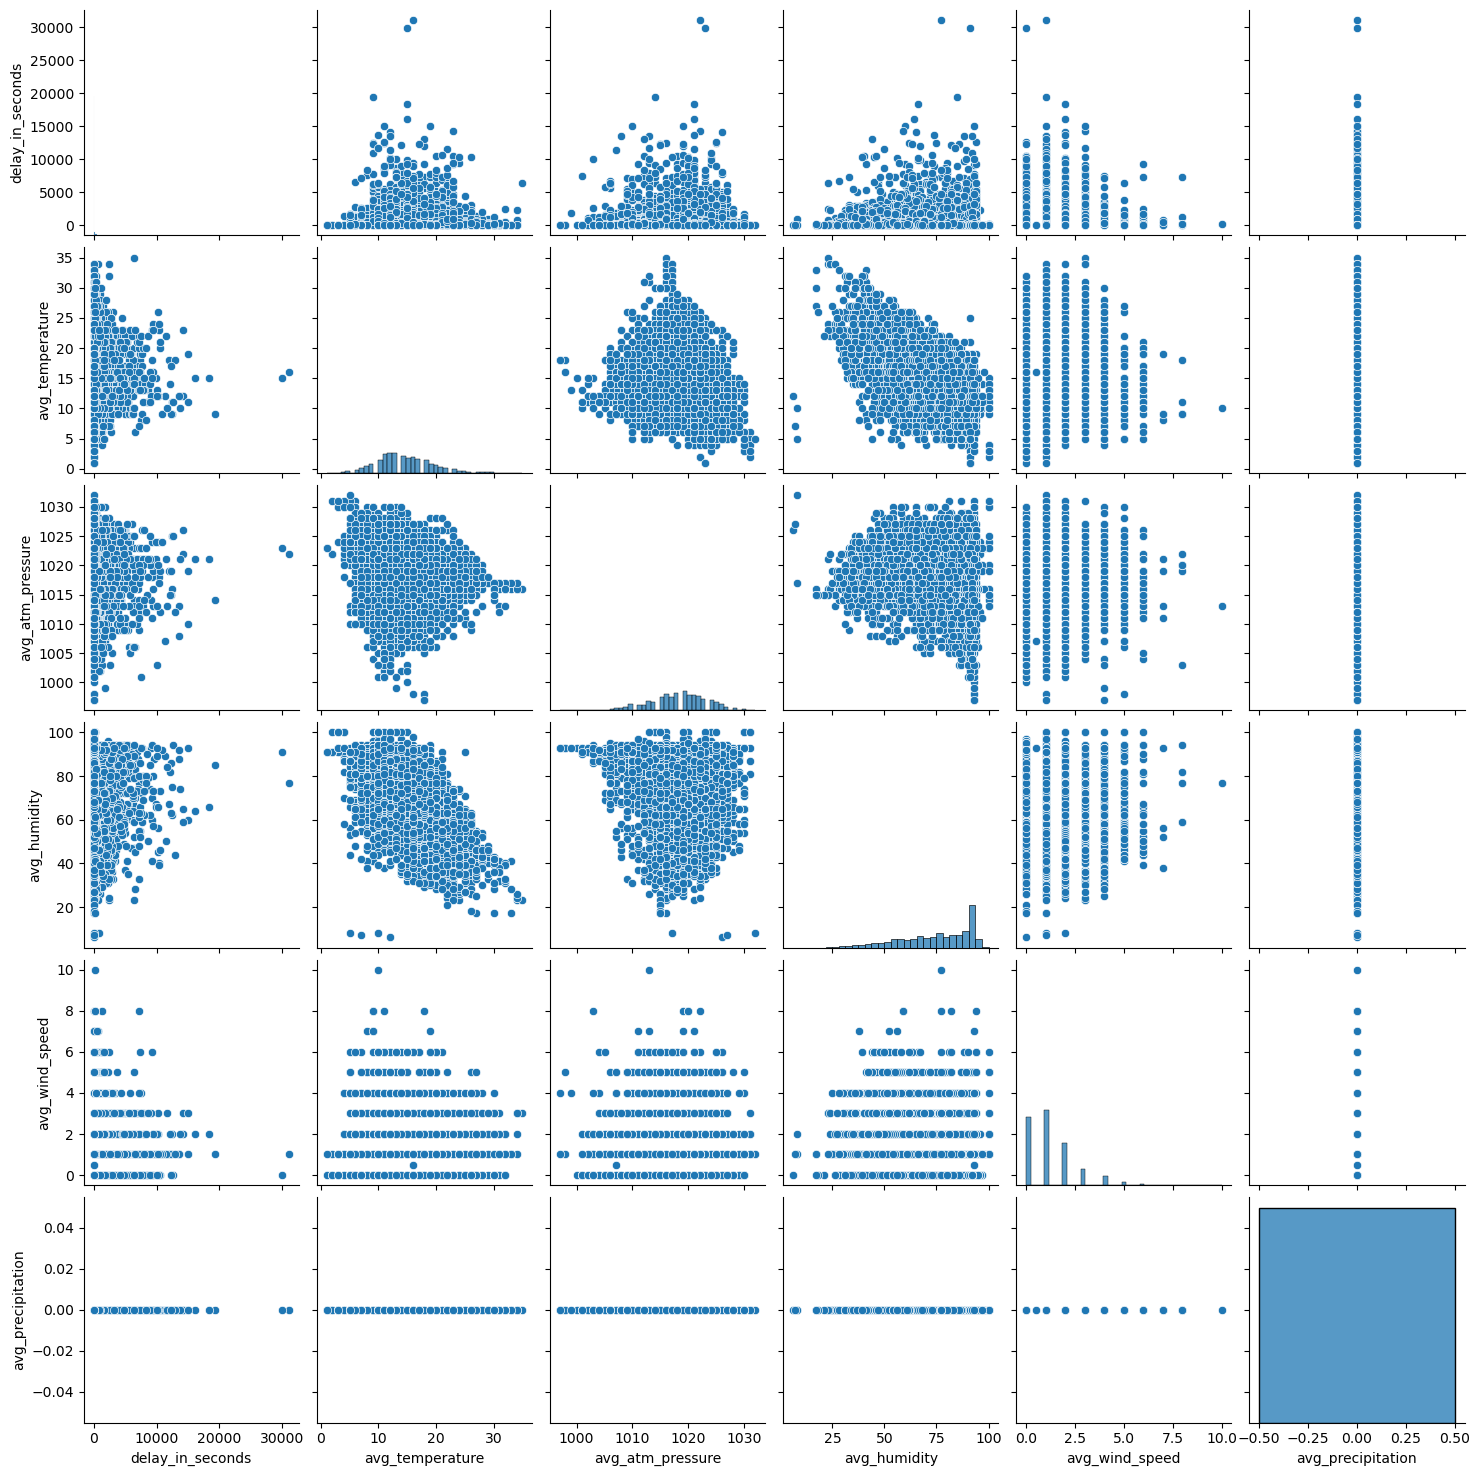

In [7]:
sns.pairplot(data)

<AxesSubplot:>

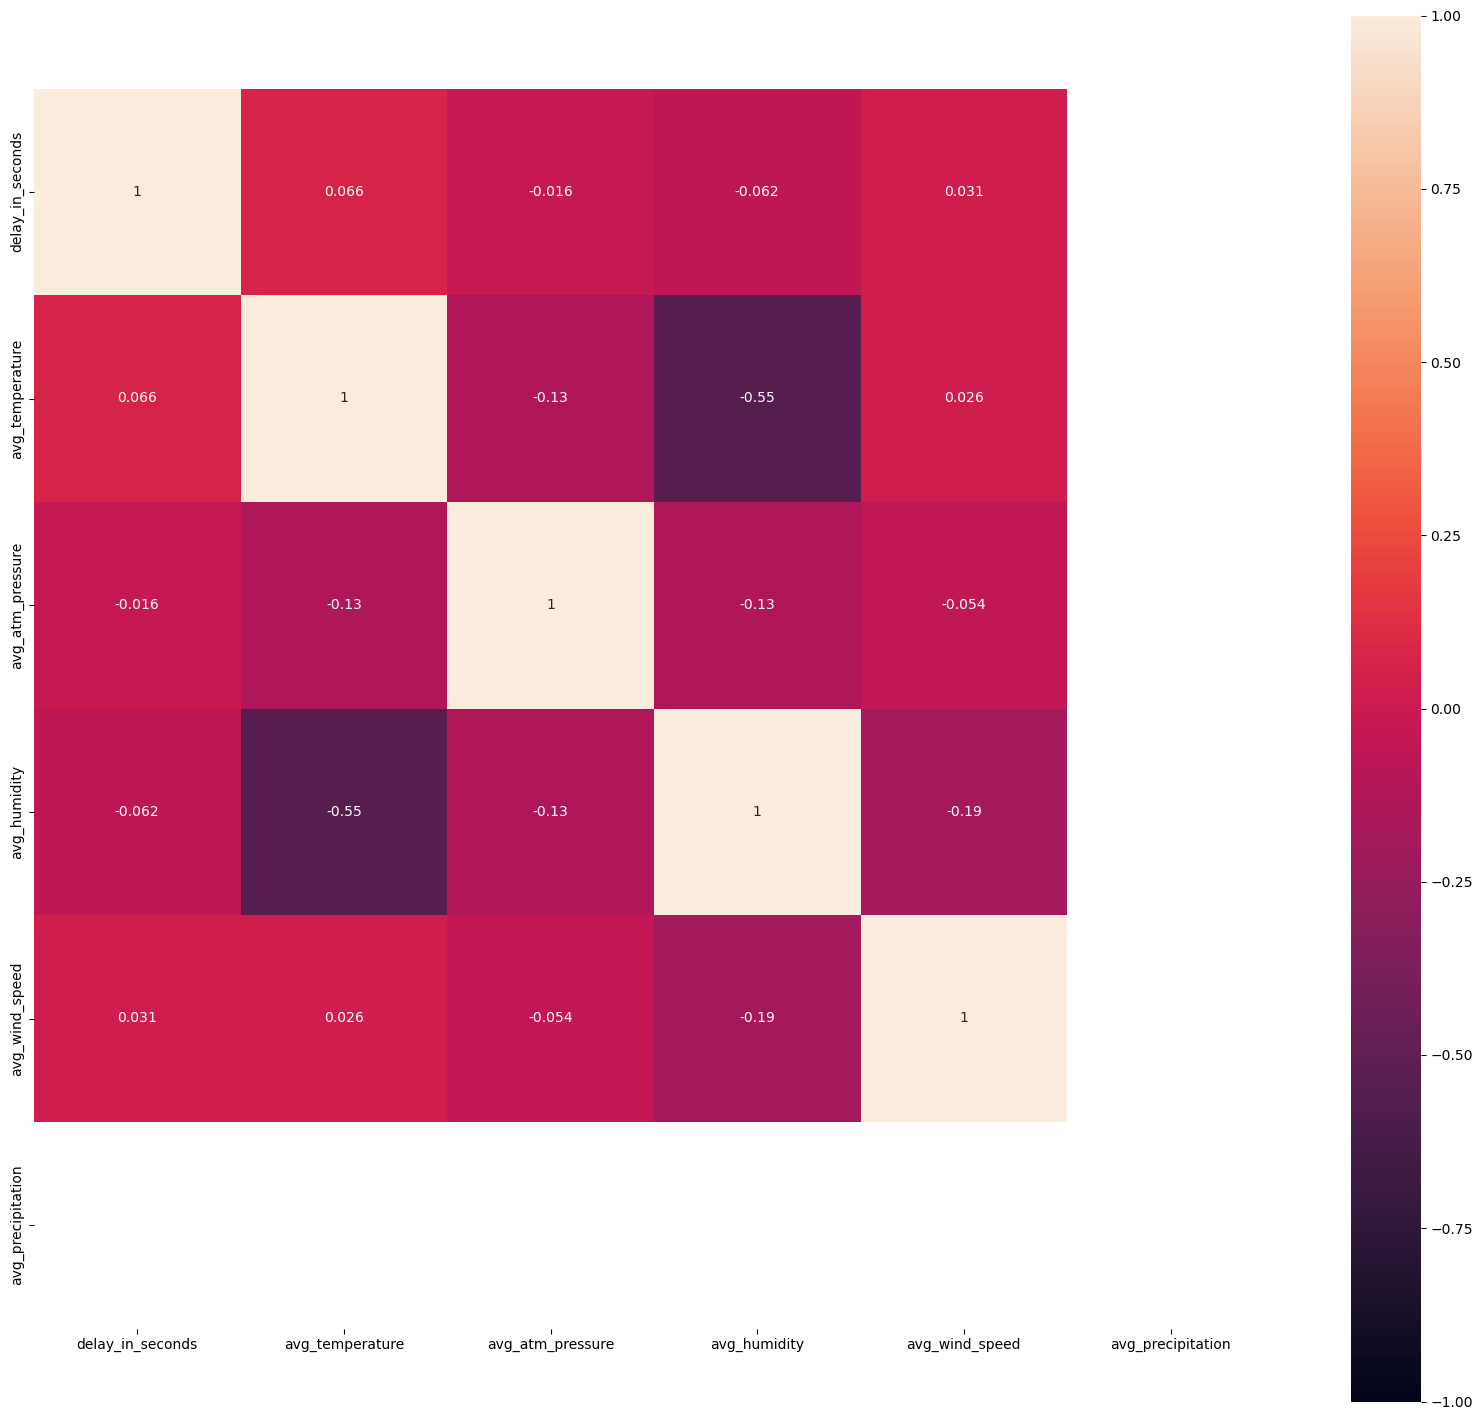

In [8]:
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(), vmin=-1, square=True, annot=True)

### **Handling missing data and categorical data**
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

In [8]:
data.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

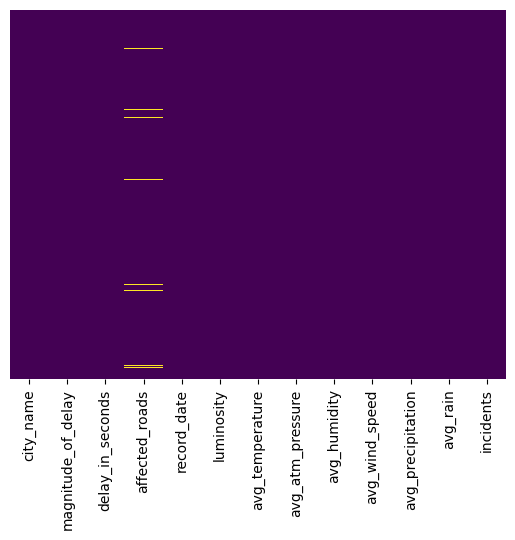

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
data[data['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,None
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,None
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


In [11]:
data.fillna(-1, inplace=True)
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


<AxesSubplot:>

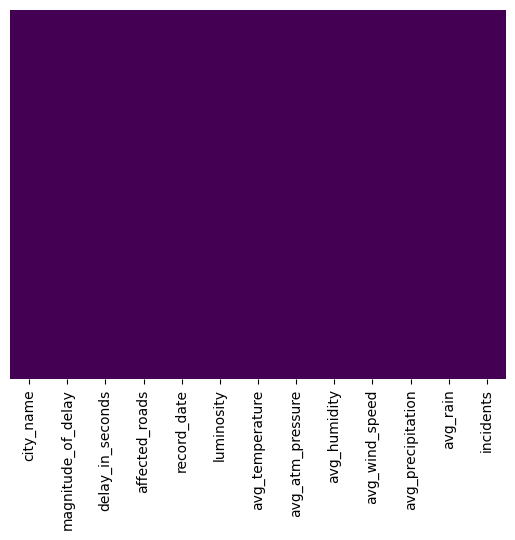

In [12]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      5000 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [14]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         679
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [11]:
data['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [16]:
data['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

In [9]:
data.drop(['city_name','avg_precipitation'], axis=1,inplace=True)
print(data['luminosity'].unique())

['DARK' 'LIGHT' 'LOW_LIGHT']


In [18]:
replace_map = {'incidents': {'None': 0, 'Low': 1, 'Medium':2, 'High': 3, 'Very_High':4}}

In [19]:
data.replace(replace_map, inplace=True)

In [20]:
data['magnitude_of_delay'] = pd.factorize(data['magnitude_of_delay'])[0] + 1
data['luminosity'] = pd.factorize(data['luminosity'])[0] + 1
data['avg_rain'] = pd.factorize(data['avg_rain'])[0] + 1

data.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,1,0,",",2021-03-15 23:00,1,12.0,1013.0,70.0,1.0,1,0
1,1,385,"N101,",2021-12-25 18:00,1,12.0,1007.0,91.0,1.0,1,0
2,1,69,",",2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,1,1
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,1,4
4,1,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,1,3


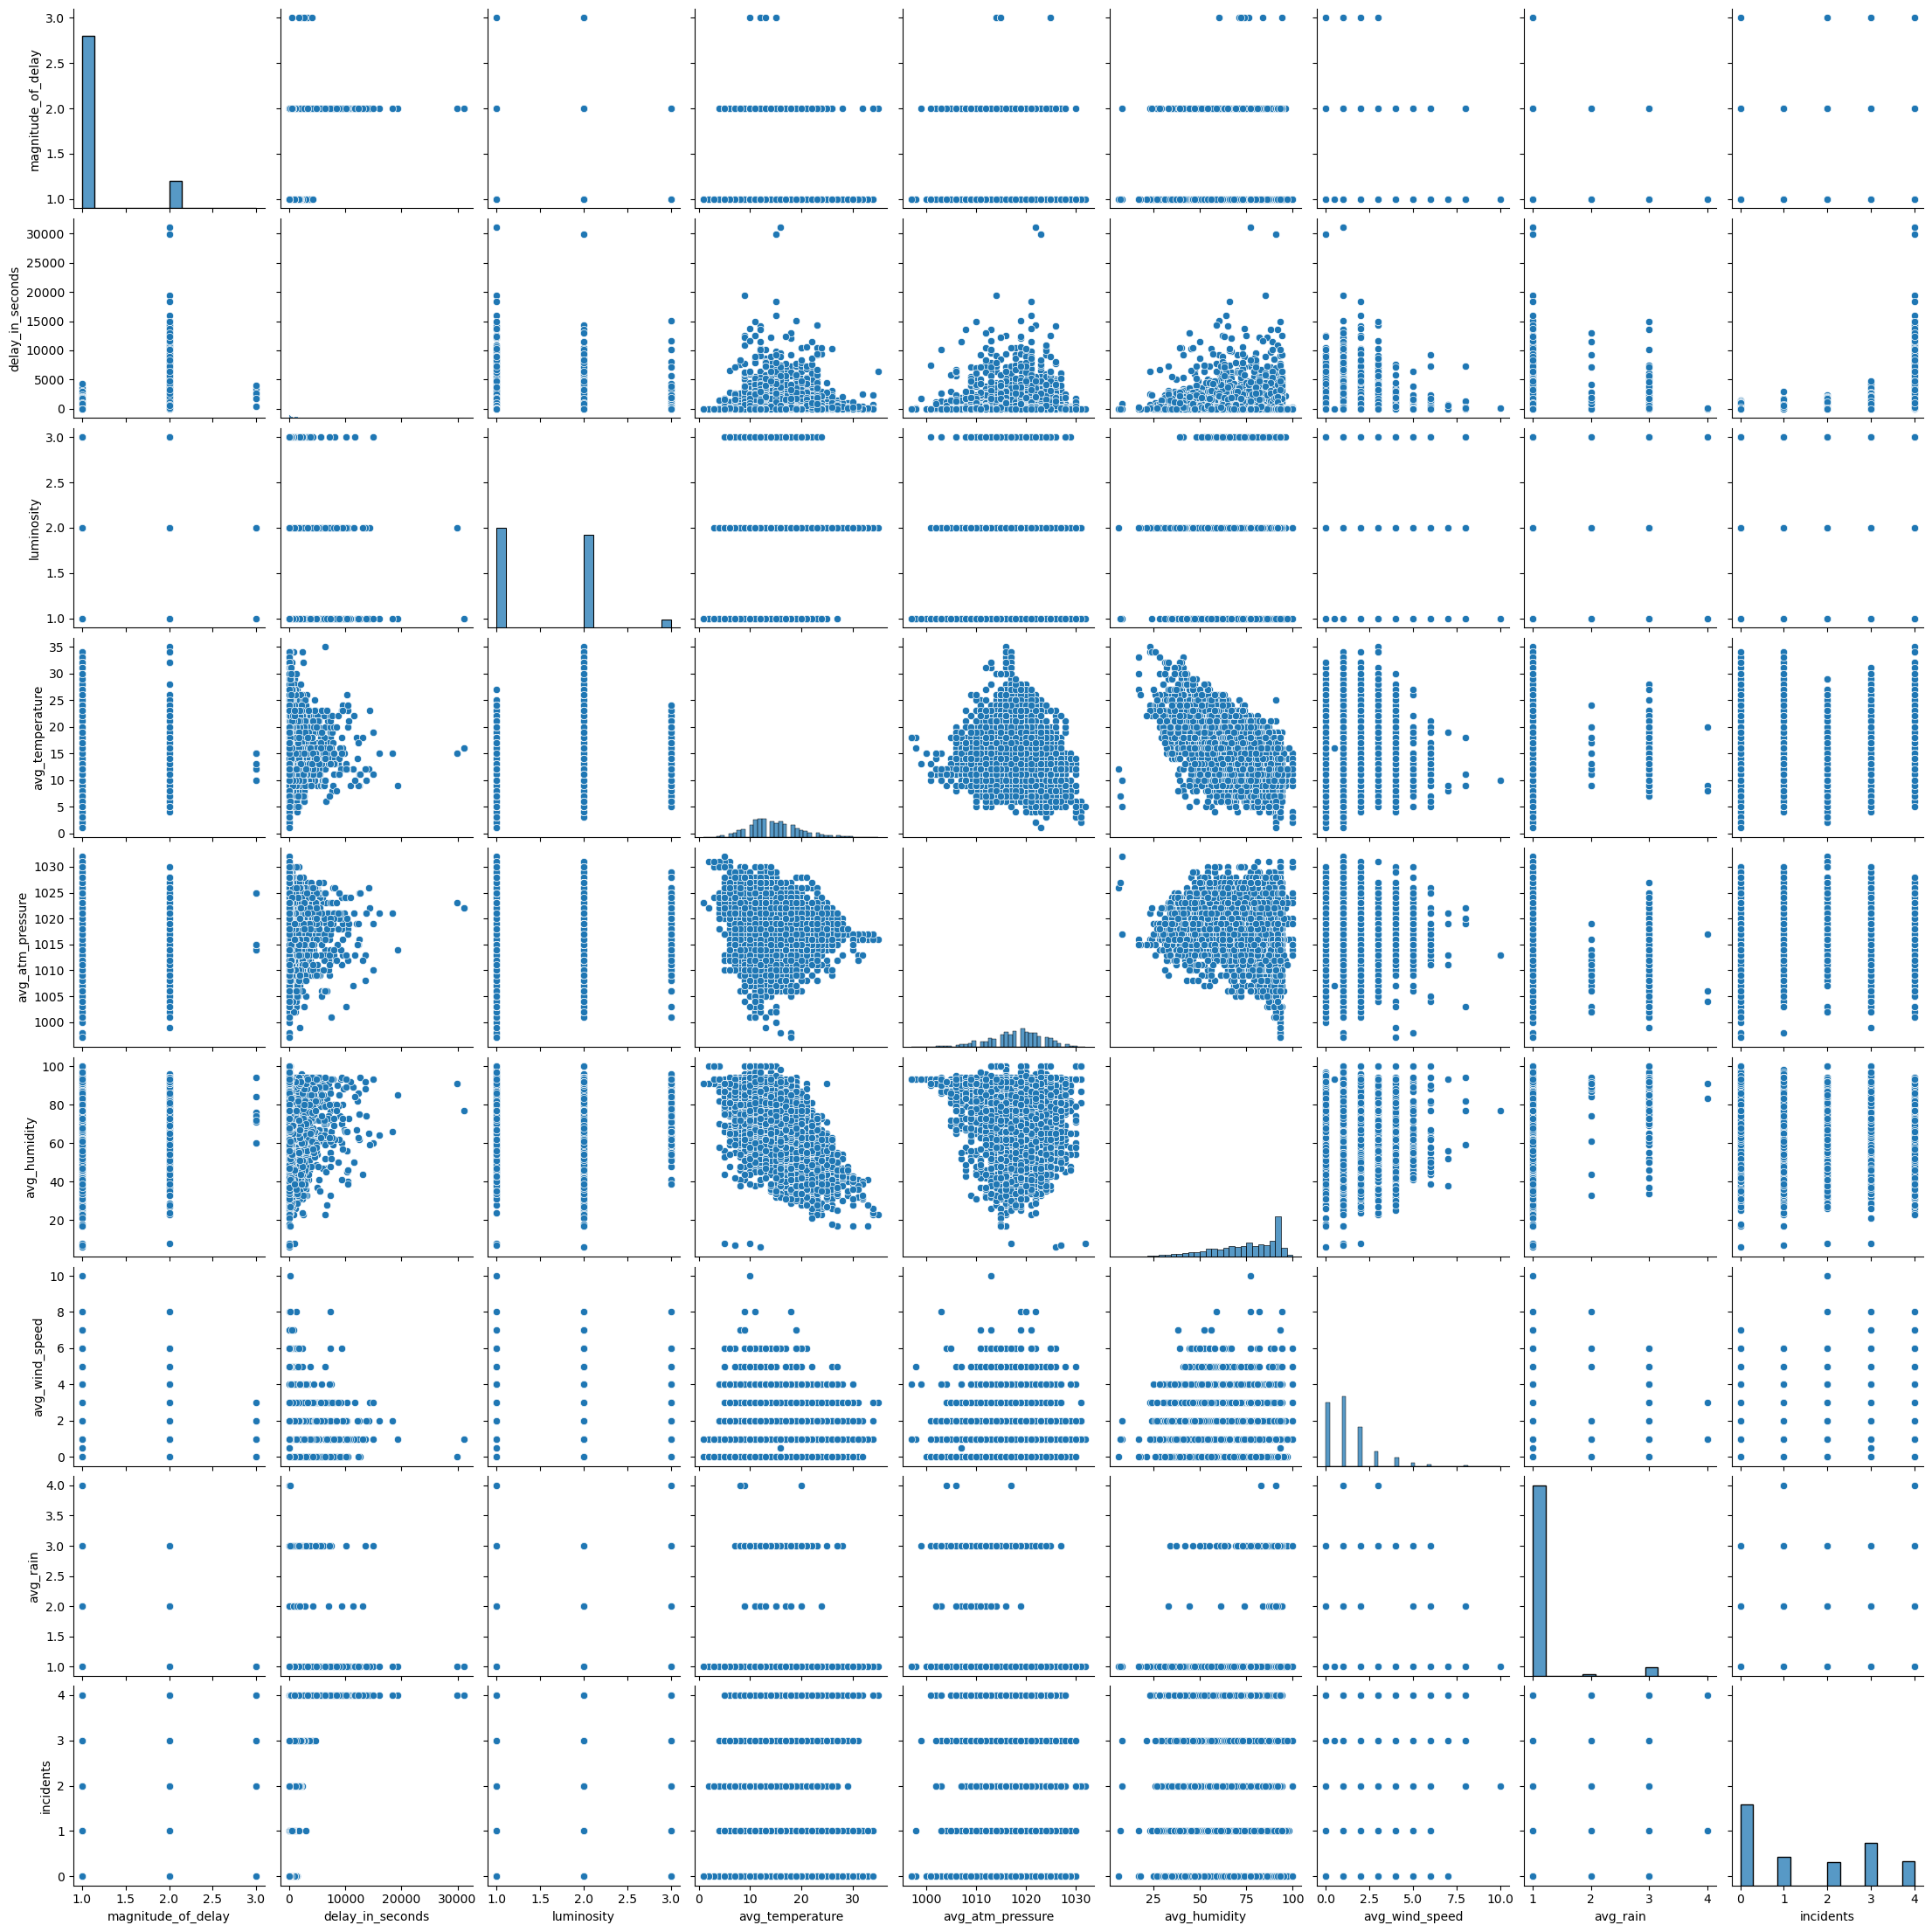

In [21]:
sns.pairplot(data)

In [22]:
data['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [23]:
data['record_date'] = pd.to_datetime(data['record_date'], format = '%Y-%m-%d %H:%M', errors ='coerce')

In [24]:
assert data['record_date'].isnull().sum()==0, 'missing record date'

In [25]:
data['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [26]:
data['record_date_year'] = data['record_date'].dt.year
data['record_date_month'] = data['record_date'].dt.month
data['record_date_day'] = data['record_date'].dt.day
data['record_date_hour'] = data['record_date'].dt.hour
data['record_date_minute'] = data['record_date'].dt.minute

In [27]:
data.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,1,0,",",2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,0,2021,3,15,23,0
1,1,385,"N101,",2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,0,2021,12,25,18,0
2,1,69,",",2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,1,2021,3,12,15,0
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,4,2021,9,29,9,0
4,1,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,3,2021,6,13,11,0


In [28]:
data.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         679
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

In [29]:
data.drop(['record_date_year', 'record_date_minute', 'record_date'], axis=1, inplace=True)
data.dropna(inplace=True)

In [30]:
data.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,1,0,",",1,12.0,1013.0,70.0,1.0,1,0,3,15,23
1,1,385,"N101,",1,12.0,1007.0,91.0,1.0,1,0,12,25,18
2,1,69,",",2,14.0,1025.0,64.0,0.0,1,1,3,12,15
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2,15.0,1028.0,75.0,1.0,1,4,9,29,9
4,1,0,"N101,N101,N101,N101,N101,",2,27.0,1020.0,52.0,1.0,1,3,6,13,11


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int64  
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   luminosity          5000 non-null   int64  
 4   avg_temperature     5000 non-null   float64
 5   avg_atm_pressure    5000 non-null   float64
 6   avg_humidity        5000 non-null   float64
 7   avg_wind_speed      5000 non-null   float64
 8   avg_rain            5000 non-null   int64  
 9   incidents           5000 non-null   int64  
 10  record_date_month   5000 non-null   int64  
 11  record_date_day     5000 non-null   int64  
 12  record_date_hour    5000 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 507.9+ KB


In [32]:
data['affected_roads']=data['affected_roads'].replace(to_replace=',', value=-1)

In [33]:
import re

it = 0
dic = {}
n_entry = 0

for estradas in data['affected_roads']:

    estradas = str(estradas)
    lista = estradas.split(',')
    #print(lista)

    for estrada in lista:

        if re.match(re.compile("[NR][0-9]+"), estrada):

            n_entry += 1

            if (estrada not in dic):

                dic[estrada] = it
                it += 1

        if re.match(re.compile("IC[0-9]"), estrada):

            n_entry += 1
            if (estrada not in dic):

                dic[estrada] = it
                it += 1
        
        if re.match(re.compile("EM[0-9]+"), estrada):

            n_entry += 1
            if (estrada not in dic):

                dic[estrada] = it
                it += 1  

        if re.match(re.compile("-1"), estrada) or re.match(re.compile('\s*'), estrada):
            n_entry += 1
            
print(dic, n_entry)

for i in dic:
    data[i]= 0
    
data.head()

{'N101': 0, 'R206': 1, 'N105': 2, 'N206': 3, 'N309': 4, 'IC5': 5, 'N310': 6, 'N207-4': 7, 'IC5 - N206': 8, 'EM579': 9} 55302


,magnitude_of_delay,delay_in_seconds,affected_roads,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,...,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,1,0,-1,1,12.0,1013.0,70.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,385,"N101,",1,12.0,1007.0,91.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,69,-1,2,14.0,1025.0,64.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2,15.0,1028.0,75.0,1.0,1,4,...,0,0,0,0,0,0,0,0,0,0
4,1,0,"N101,N101,N101,N101,N101,",2,27.0,1020.0,52.0,1.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data['affected_roads'].describe()

count                         5000
unique                         678
top       N101,N101,N101,N101,N101
freq                          1514
Name: affected_roads, dtype: object

In [35]:
for i in range(0,5000):
    if data['affected_roads'][i]!=-1:
        l = (data['affected_roads'][i]).split(",")
        if '' in l:
            l.remove('')
        for x in l:
            data[x][i] = 1 

/tmp/ipykernel_5588/865235486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][i] = 1


In [36]:
data.drop(['affected_roads'], axis=1, inplace=True)
data.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,...,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,1,0,1,12.0,1013.0,70.0,1.0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,1,385,1,12.0,1007.0,91.0,1.0,1,0,12,...,1,0,0,0,0,0,0,0,0,0
2,1,69,2,14.0,1025.0,64.0,0.0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,2,2297,2,15.0,1028.0,75.0,1.0,1,4,9,...,1,1,1,0,0,0,0,0,0,0
4,1,0,2,27.0,1020.0,52.0,1.0,1,3,6,...,1,0,0,0,0,0,0,0,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   int64  
 1   delay_in_seconds    5000 non-null   int64  
 2   luminosity          5000 non-null   int64  
 3   avg_temperature     5000 non-null   float64
 4   avg_atm_pressure    5000 non-null   float64
 5   avg_humidity        5000 non-null   float64
 6   avg_wind_speed      5000 non-null   float64
 7   avg_rain            5000 non-null   int64  
 8   incidents           5000 non-null   int64  
 9   record_date_month   5000 non-null   int64  
 10  record_date_day     5000 non-null   int64  
 11  record_date_hour    5000 non-null   int64  
 12  N101                5000 non-null   int64  
 13  R206                5000 non-null   int64  
 14  N105                5000 non-null   int64  
 15  N206                5000 non-null   int64  
 16  N309  

### **Data Analysis**

<AxesSubplot:>

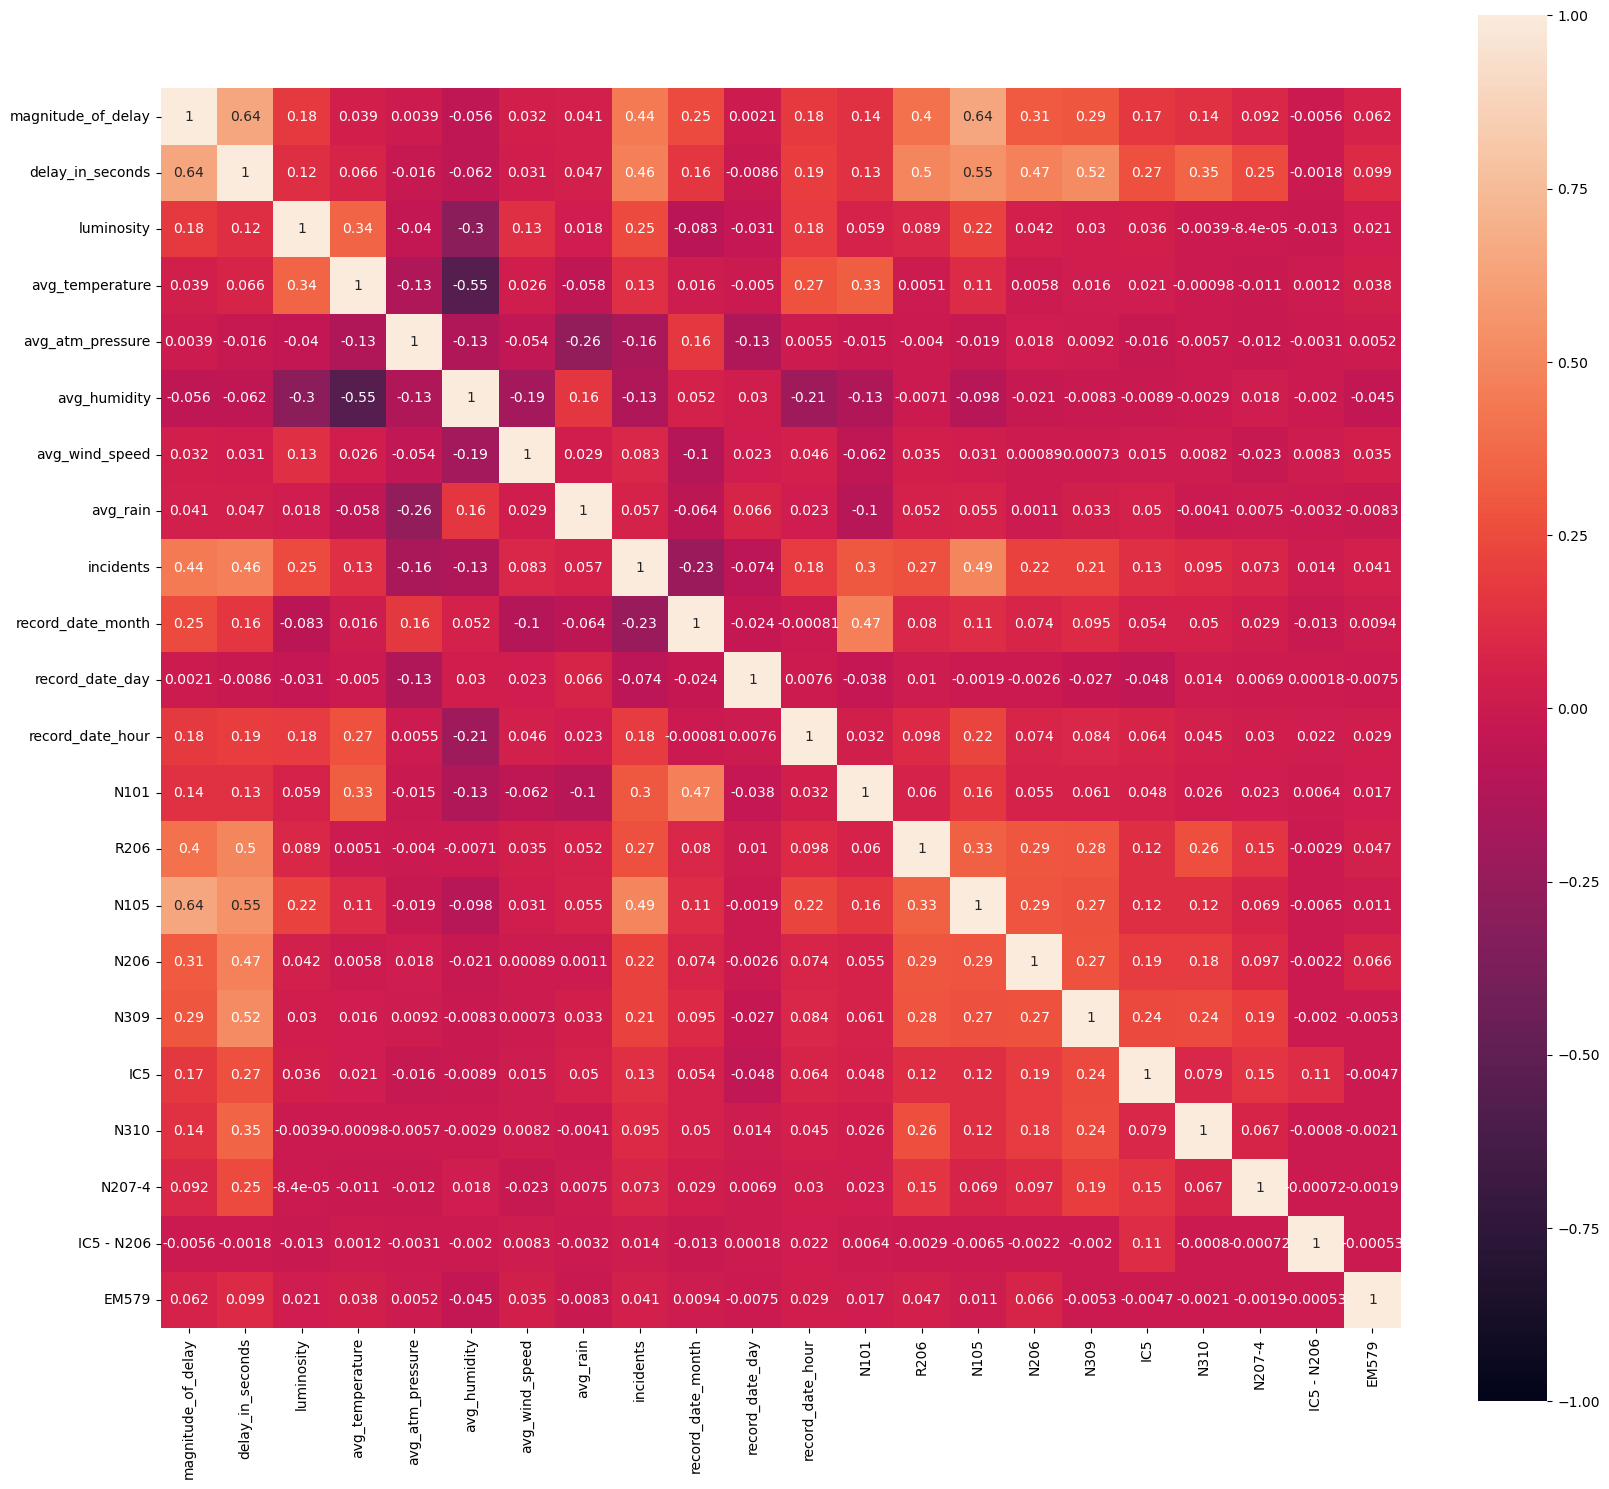

In [43]:
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(), vmin=-1, square=True, annot=True)

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


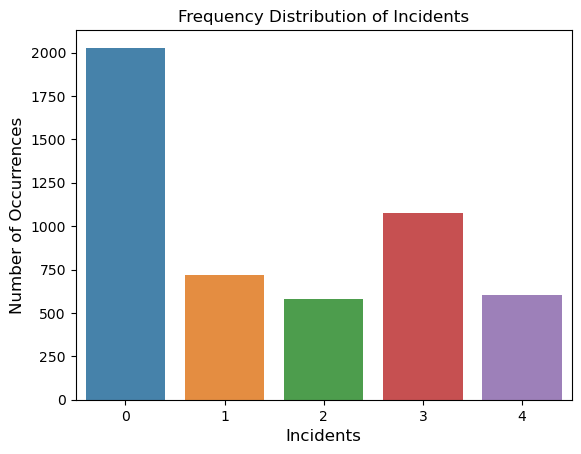

In [42]:
incidents_count = data['incidents'].value_counts()
sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


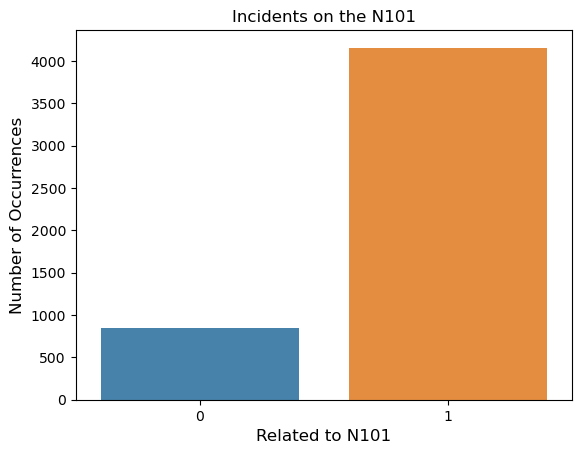

In [43]:
n_count = data['N101'].value_counts()
sns.barplot(n_count.index, n_count.values, alpha=0.9)
plt.title('Incidents on the N101')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N101', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


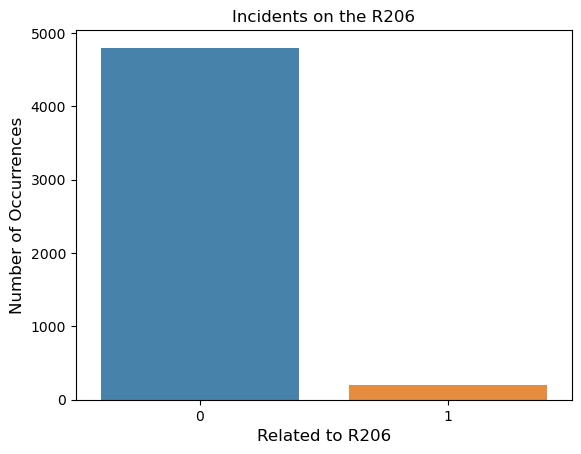

In [44]:
r_count = data['R206'].value_counts()
sns.barplot(r_count.index, r_count.values, alpha=0.9)
plt.title('Incidents on the R206')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to R206', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


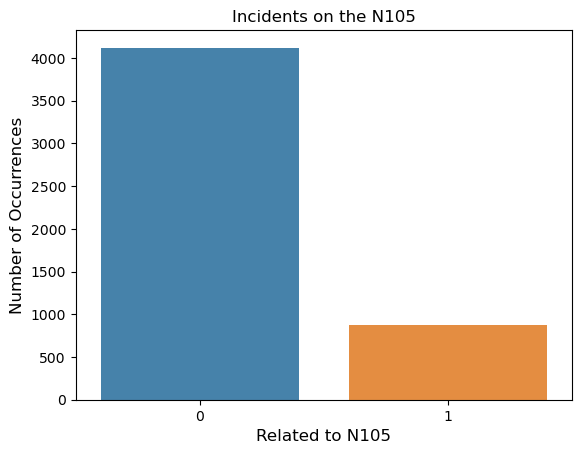

In [45]:
n2_count = data['N105'].value_counts()
sns.barplot(n2_count.index, n2_count.values, alpha=0.9)
plt.title('Incidents on the N105')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N105', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


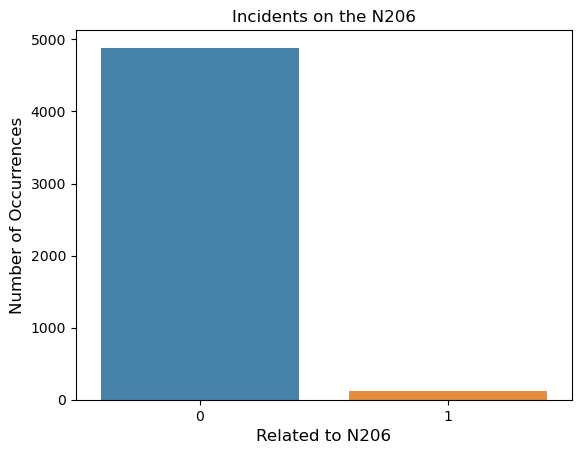

In [46]:
count = data['N206'].value_counts()
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Incidents on the N206')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N206', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nando/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


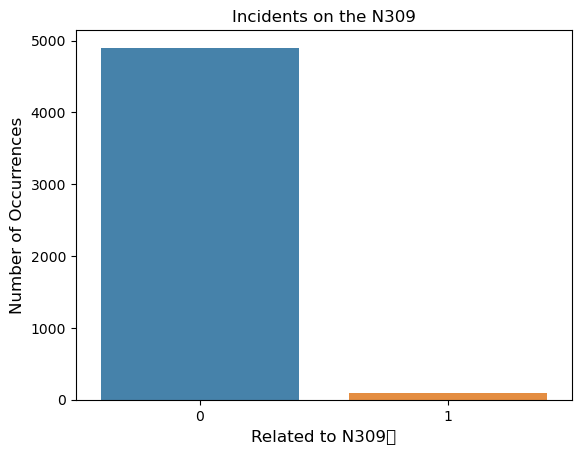

In [47]:
count1 = data['N309'].value_counts()
sns.barplot(count1.index, count1.values, alpha=0.9)
plt.title('Incidents on the N309')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N309	', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


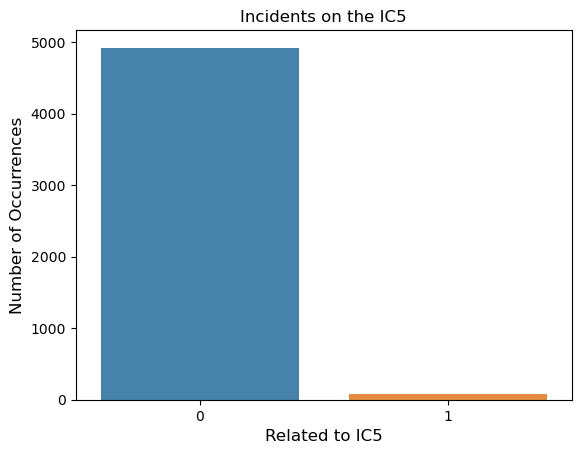

In [48]:
count3 = data['IC5'].value_counts()
sns.barplot(count3.index, count3.values, alpha=0.9)
plt.title('Incidents on the IC5')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to IC5', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


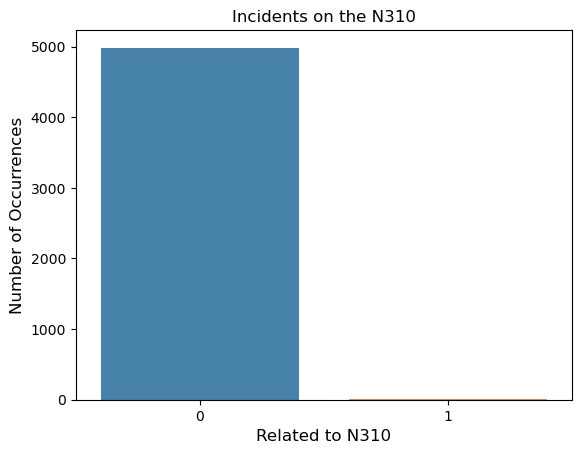

In [49]:
n2_count = data['N310'].value_counts()
sns.barplot(n2_count.index, n2_count.values, alpha=0.9)
plt.title('Incidents on the N310')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N310', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


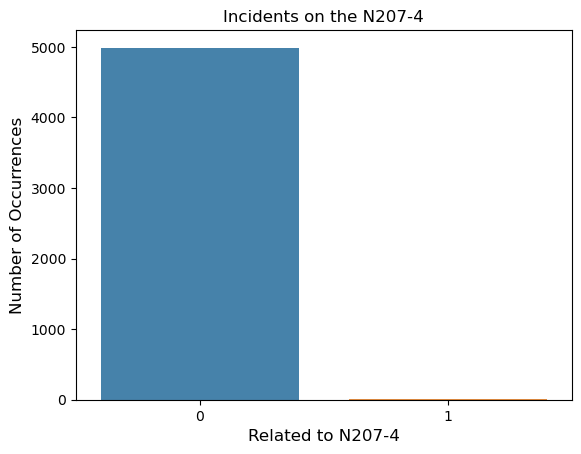

In [50]:
count4 = data['N207-4'].value_counts()
sns.barplot(count4.index, count4.values, alpha=0.9)
plt.title('Incidents on the N207-4')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to N207-4', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


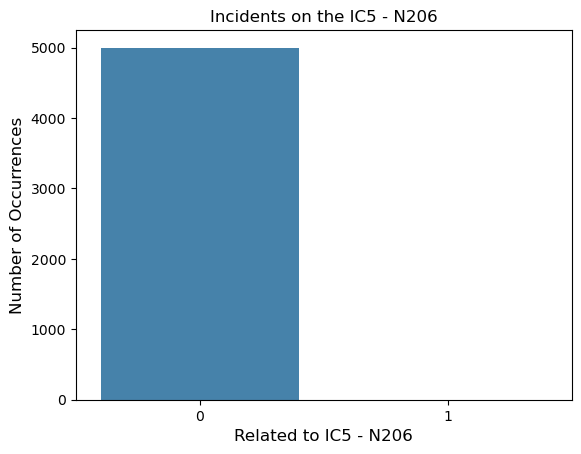

In [51]:
count5 = data['IC5 - N206'].value_counts()
sns.barplot(count5.index, count5.values, alpha=0.9)
plt.title('Incidents on the IC5 - N206')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to IC5 - N206', fontsize=12)
plt.show()

/home/nando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


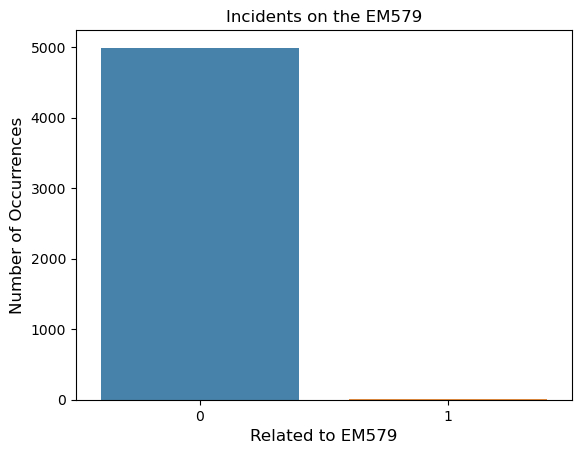

In [52]:
count6 = data['EM579'].value_counts()
sns.barplot(count6.index, count6.values, alpha=0.9)
plt.title('Incidents on the EM579')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Related to EM579', fontsize=12)
plt.show()

### **Train a Model**

In [92]:
X = data.drop(['incidents'], axis=1)
Y = data['incidents'].to_frame()

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2021)

In [94]:
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       491
           1       0.78      0.88      0.83       182
           2       0.88      0.69      0.77       152
           3       0.91      0.88      0.89       277
           4       0.86      0.93      0.89       148

    accuracy                           0.90      1250
   macro avg       0.88      0.87      0.87      1250
weighted avg       0.90      0.90      0.90      1250



In [100]:
clf = LogisticRegression()
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
clf.fit(X_train_minmax, Y_train.values.ravel())
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       491
           1       0.00      0.00      0.00       182
           2       0.12      0.77      0.21       152
           3       0.00      0.00      0.00       277
           4       0.48      0.86      0.61       148

    accuracy                           0.20      1250
   macro avg       0.12      0.33      0.16      1250
weighted avg       0.07      0.20      0.10      1250



/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/nando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [96]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train.values.ravel())
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       491
           1       0.81      0.89      0.85       182
           2       0.88      0.70      0.78       152
           3       0.90      0.88      0.89       277
           4       0.87      0.93      0.90       148

    accuracy                           0.91      1250
   macro avg       0.89      0.88      0.88      1250
weighted avg       0.91      0.91      0.90      1250

